# **MATE Floats! Coding Notebook** - Day 4

Created by Ethan C. Campbell for NCAT/MATE/GO-BGC Marine Technology Summer Program

Thursday, August 24, 2023

In [ ]:
import numpy as np                         # NumPy is an array and math library
import matplotlib.pyplot as plt            # Matplotlib is a visualization (plotting) library
import pandas as pd                        # Pandas lets us work with spreadsheet (.csv) data
from datetime import datetime, timedelta   # Datetime helps us work with dates and times

## Part 1: Loading and plotting R/V Rachel Carson CTD casts

First, let's download three `.csv` data files from Google Drive here: https://drive.google.com/drive/folders/1Am6XdlB-APQ3ccOvLeGK8DFPQ2OnPeJD?usp=sharing. Two of the files are CTD casts that were collected from the R/V Rachel Carson off of Carkeek Park near Seattle. ***Save these two files to your computer.***

Let's first take a look at the raw files, including their headers.

Next, we can upload the files to this Google Colab notebook. ***Click the sidebar folder icon on the left, then use the page-with-arrow icon at the top to select the files and upload them.*** NOTE: uploaded files will be deleted from Google Colab when you refresh this notebook!

We will specify each **filepath** using string variables:

In [ ]:
filepath_0 = '/content/2023051001001_Carkeek.csv'
filepath_1 = '/content/2023051101001_Carkeek.csv'

Now, we can load the files using `pandas`:

> **`pd.read_csv(FILEPATH, ARGUMENTS...)`**

This function is very customizable using the many optional `ARGUMENTS`, which allow it to handle almost any file. You can find documentation about the arguments [at this link](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

***Let's first take a look at the data file using a simple text editor. Notice the long header. What argument can we use to exclude the header from being loaded?***

Below, we'll load each data file using ``pd.read_csv()`` and store each file into a new variable.

We can look at the data using **`display()`** (which is a fancy version of `print()` for DataFrames):

In [ ]:
data_0 = pd.read_csv(filepath_0,comment='#')
data_1 = pd.read_csv(filepath_1,comment='#')

display(data_0)

,Unnamed: 0,altM,CStarTr0,c0mS/cm,density00,depSM,latitude,longitude,flECO-AFL,modError,sbeox0Mg/L,sbeox0ML/L,ph,potemp090C,prDM,sal00,t090C,scan,nbf,flag
0,0,98.53,71.0825,31.662958,1021.7317,2.101,47.71418,-122.40854,2.8127,0,10.6450,7.4488,9.271,10.2155,2.119,28.3385,10.2157,3408,0,0.0
1,1,98.53,71.0825,31.662061,1021.7317,2.005,47.71418,-122.40854,2.8127,0,10.6446,7.4484,9.271,10.2140,2.022,28.3388,10.2143,3409,0,0.0
2,2,98.53,71.0825,31.661464,1021.7323,2.045,47.71418,-122.40854,2.8127,0,10.6443,7.4483,9.271,10.2129,2.062,28.3391,10.2131,3410,0,0.0
3,3,98.53,71.0825,31.660448,1021.7323,2.005,47.71418,-122.40854,2.8713,0,10.6441,7.4481,9.271,10.2117,2.022,28.3390,10.2119,3411,0,0.0
4,4,98.53,71.0825,31.658416,1021.7325,1.981,47.71418,-122.40854,3.1057,0,10.6443,7.4483,9.271,10.2093,1.998,28.3389,10.2095,3412,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8200,8200,11.99,83.1087,31.920640,1024.1134,173.726,47.71316,-122.40812,0.1753,0,7.0198,4.9120,8.788,8.3719,175.266,30.0190,8.3887,11608,0,0.0
8201,8201,11.99,83.1087,31.920640,1024.1135,173.726,47.71316,-122.40812,0.1753,0,7.0201,4.9123,8.788,8.3717,175.266,30.0191,8.3886,11609,0,0.0
8202,8202,11.99,83.1087,31.920820,1024.1141,173.846,47.71316,-122.40812,0.1753,0,7.0204,4.9125,8.788,8.3718,175.387,30.0191,8.3887,11610,0,0.0
8203,8203,11.99,83.1087,31.920579,1024.1129,173.613,47.71316,-122.40812,0.1753,0,7.0205,4.9125,8.783,8.3719,175.152,30.0190,8.3887,11611,0,0.0


The data in a `pandas` DataFrame is similar to a NumPy 2-D array, except we use **column labels** to refer to columns and **index** values to refer to rows.

To retrieve a specific column, we use bracket notation: **`data_frame[COLUMN_LABEL]`**.

In [ ]:
# For example:
data_0['t090C']

0       10.2157
1       10.2143
2       10.2131
3       10.2119
4       10.2095
         ...   
8200     8.3887
8201     8.3886
8202     8.3887
8203     8.3887
8204     8.3889
Name: t090C, Length: 8205, dtype: float64

With these tools, we can make line plots of temperature vs. depth that include both CTD casts.

***Can you try plotting another parameter vs. depth? Note: the file contains salinity, oxygen, fluorescence, and pH data.***

The following line of code flips the y-axis so the surface is at the top: **`plt.gca().invert_yaxis()`**.

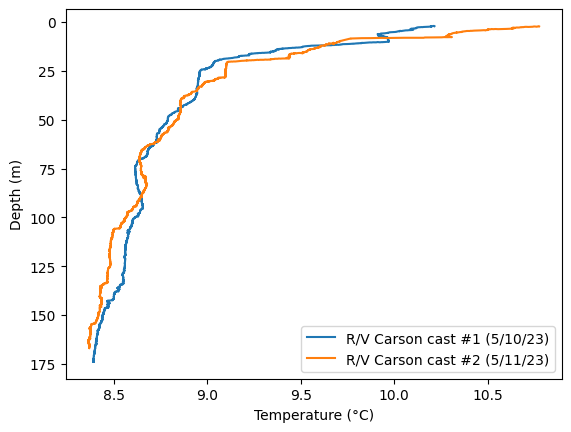

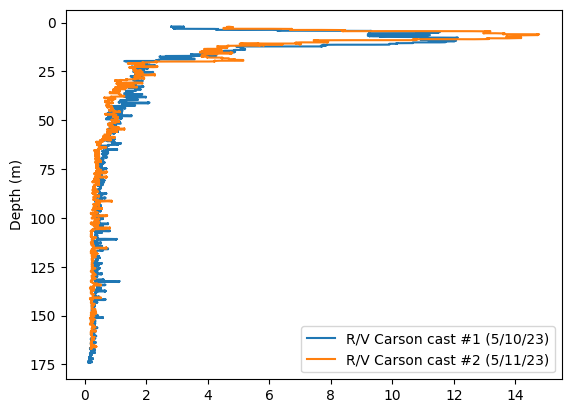

In [ ]:
# Temperature vs. depth profile
plt.plot(data_0['t090C'],data_0['depSM'],label='R/V Carson cast #1 (5/10/23)')
plt.plot(data_1['t090C'],data_1['depSM'],label='R/V Carson cast #2 (5/11/23)')
plt.legend()
plt.gca().invert_yaxis()   # This reverses the y-axis
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)');

# Write your code here:
plt.figure()
plt.plot(data_0['flECO-AFL'],data_0['depSM'],label='R/V Carson cast #1 (5/10/23)')
plt.plot(data_1['flECO-AFL'],data_1['depSM'],label='R/V Carson cast #2 (5/11/23)')
plt.legend()
plt.gca().invert_yaxis()   # This reverses the y-axis
plt.ylabel('Depth (m)');

***How do the casts look similar and how do they look different? What could be some causes of the differences?***

***What do you observe in the other parameter(s) that you plotted?***

## Part 2: Loading and plotting seaglider data

At this link is a file with a **seaglider** (or just **"glider"**) profile from the same cruise, one day after the second R/V Carson cast.

If you haven't already, ***download*** the glider `.csv` data file from Google Drive here: https://drive.google.com/drive/folders/1Am6XdlB-APQ3ccOvLeGK8DFPQ2OnPeJD?usp=sharing. ***Save the file to your computer, then load it into Google Colab.***

Let's load and display the data using `pandas`:

In [ ]:
filepath_2 = '/content/20230512_glider.csv'

data_2 = pd.read_csv(filepath_2,parse_dates=['time'])

display(data_2)

,sg_data_point,time,pressure,depth,temperature,conductivity,salinity,sigma_theta,density,latitude,longitude,buoyancy,speed,glide_angle,horz_speed,vert_speed,polar_heading
0,0,2023-05-12 19:14:17.464999936,1.076991,1.067980,11.409176,NaN,NaN,NaN,NaN,47.715300,-122.398800,NaN,NaN,NaN,NaN,NaN,1.495747
1,1,2023-05-12 19:14:22.731000064,1.117253,1.107904,11.409607,NaN,NaN,NaN,NaN,47.715302,-122.398799,NaN,NaN,NaN,NaN,NaN,1.628392
2,2,2023-05-12 19:14:29.736000000,1.157514,1.147829,11.411506,NaN,NaN,NaN,NaN,47.715306,-122.398797,NaN,NaN,NaN,NaN,NaN,1.516691
3,3,2023-05-12 19:14:35.012999936,1.157514,1.147829,11.414287,NaN,NaN,NaN,NaN,47.715310,-122.398795,NaN,NaN,NaN,NaN,NaN,1.621411
4,4,2023-05-12 19:14:40.288000000,1.268233,1.257621,11.412624,NaN,NaN,NaN,NaN,47.715314,-122.398794,NaN,NaN,NaN,NaN,NaN,1.574287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,335,2023-05-12 20:06:59.275000064,0.513332,0.509038,11.268633,NaN,NaN,NaN,NaN,47.724696,-122.397495,NaN,NaN,NaN,NaN,NaN,2.405064
336,336,2023-05-12 20:07:04.279000064,0.402614,0.399245,11.278361,NaN,NaN,NaN,NaN,47.724699,-122.397493,NaN,NaN,NaN,NaN,NaN,2.466150
337,337,2023-05-12 20:07:08.697999872,0.422744,0.419208,11.290254,NaN,NaN,NaN,NaN,47.724703,-122.397491,NaN,NaN,NaN,NaN,NaN,2.069960
338,338,2023-05-12 20:07:14.273999872,0.372418,0.369302,11.305961,NaN,NaN,NaN,NaN,47.724706,-122.397490,NaN,NaN,NaN,NaN,NaN,2.134538


***What data parameters do you see, and what do you expect each parameter represents?***

As a first step, let's see whether the glider was sampling the same region as the R/V Rachel Carson. We can plot each of their tracks using latitude and longitude:

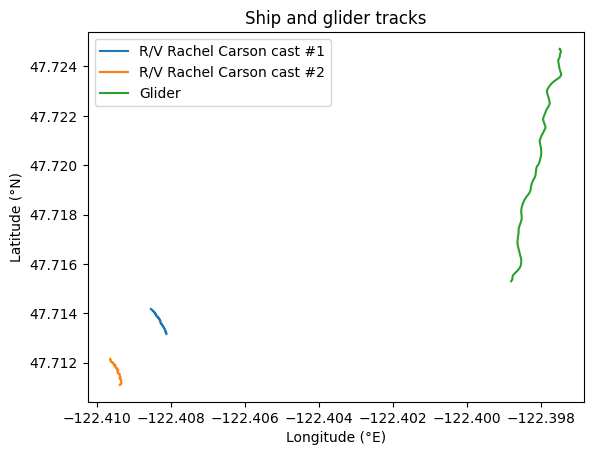

In [ ]:
plt.plot(data_0['longitude'],data_0['latitude'],label='R/V Rachel Carson cast #1')
plt.plot(data_1['longitude'],data_1['latitude'],label='R/V Rachel Carson cast #2')
plt.plot(data_2['longitude'],data_2['latitude'],label='Glider')
plt.legend()
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title('Ship and glider tracks');

One way to visualize glider data is in **time-depth space**. In other words, time is on the x-axis and depth is on the y-axis. If we use a scatter plot (`plt.scatter()`), we can color the points by another quantity, like temperature or buoyancy.

***Try changing the `c` (color) argument below to plot different quantities in time-depth space. What do you notice?***

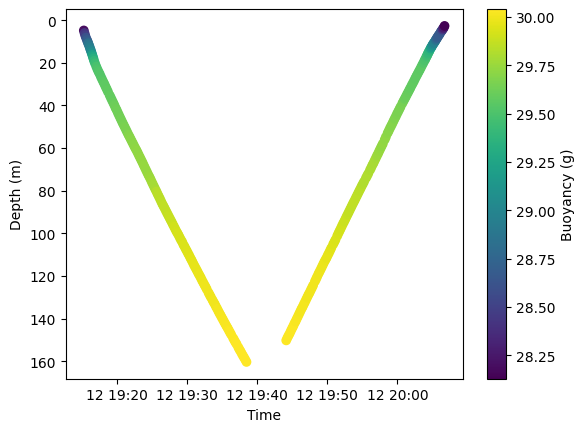

In [ ]:
plt.scatter(data_2['time'],data_2['depth'],c=data_2['salinity'])
plt.colorbar(label='Buoyancy (g)')   # This adds the color bar and color label on the right
plt.gca().invert_yaxis()             # This reverses the y-axis
plt.xlabel('Time')
plt.ylabel('Depth (m)');

Of course, we can also plot parameter vs. **depth profiles**.

***Copy the code from above, where you plotted temperature profiles from the R/V Carson ship CTD casts. Then add the glider temperature data.***

(25.0, 0.0)

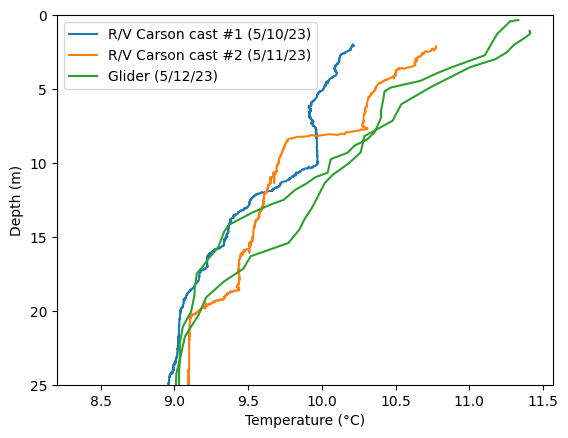

In [ ]:
# Write your code here:
plt.plot(data_0['t090C'],data_0['depSM'],label='R/V Carson cast #1 (5/10/23)')
plt.plot(data_1['t090C'],data_1['depSM'],label='R/V Carson cast #2 (5/11/23)')
plt.plot(data_2['temperature'],data_2['depth'],label='Glider (5/12/23)')
plt.legend()
plt.gca().invert_yaxis()   # This reverses the y-axis
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)');
plt.ylim([25,0])

We can zoom in to certain depths by changing the y-axis scale using:

> **`plt.ylim([LOWER,UPPER])`**

***By `plt.ylim()` to the plot above, what can we observe about the differences between the casts near the surface and near the bottom? Why do these differences exist?***

***If we wanted to calibrate a glider sensor to the R/V Carson's sensor, what depths would we want to use?***

## Part 3: Exploring Argo float data

**Links:**
* Earth Nullschool map: http://data.scripps.earth/argoviz/
* Argovis – get your API key here: https://argovis-keygen.colorado.edu/
* Argovis: https://argovis.colorado.edu/
* Google Slides for your plots: https://docs.google.com/presentation/d/1MqYfkOHBv9KWO41ZgK0MMnfQ8E9zah3AntKlZkrWrgU/edit?usp=sharing